In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()

**Customizing Line Chart**

<Axes: xlabel='month_name'>

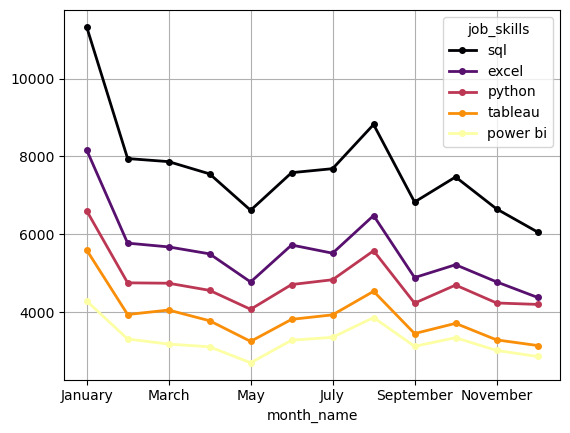

In [ ]:
df_req= df[df['job_skills'].notna()]
df_da= df_req[df_req['job_title_short']=='Data Analyst'].copy()

import ast
df_da['job_skills']=df_da['job_skills'].apply(lambda x: ast.literal_eval(x))

df_da_exp=df_da.explode('job_skills')
df_da_pt= df_da_exp.pivot_table(index='month_name',columns='job_skills',aggfunc='size',fill_value=0)

top_skills = df_da_exp.groupby('job_skills').size().sort_values(ascending=False).head(5).index
final_df=df_da_pt.loc[:,top_skills].reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                    'July', 'August', 'September', 'October', 'November', 'December'])
final_df.plot(kind='line',
            marker='o', # 'o' , '+' , 'x', 'D', 's', 'v', '^', '<', '>', 'p', '*'
            grid=True,
            linewidth=2,
            linestyle='-', # '--', '-.', ':'
            colormap='inferno', # 'viridis', 'plasma', 'magma', 'cividis', 'inferno', 'copper', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter'
            markersize=4,
       
            )


**Customizing Scatter Chart**

Text(0, 0.5, 'Median Salary')

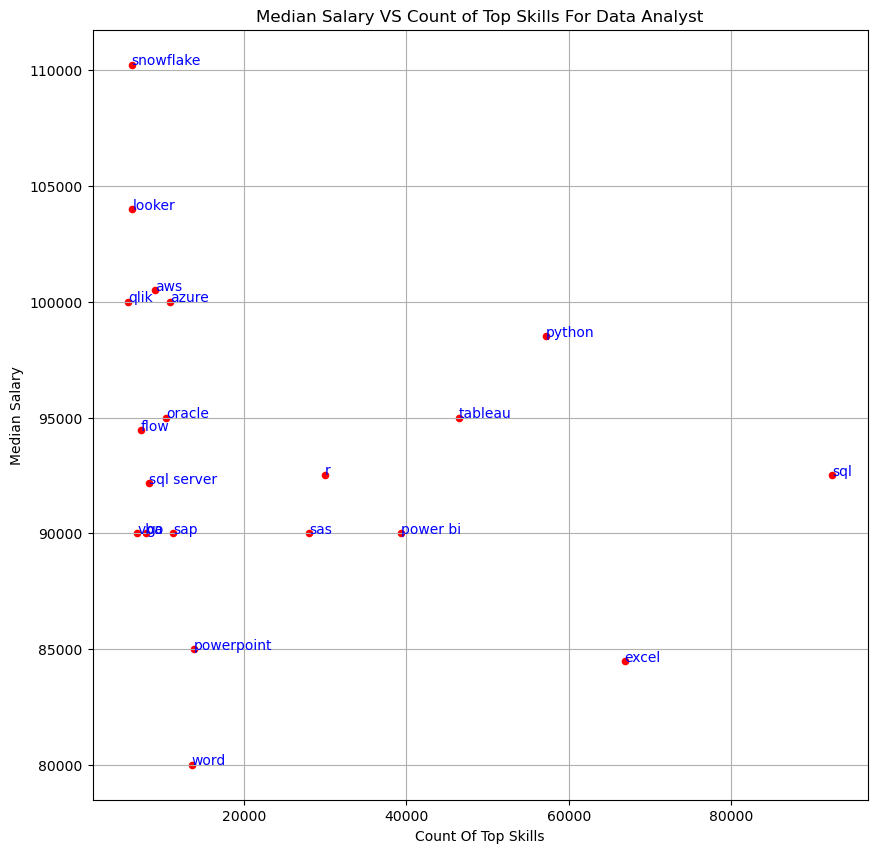

In [ ]:
df_da= df[df['job_title_short']=='Data Analyst'].copy() #Only Data Analyst Jobs

df_da=df_da[df_da['job_skills'].notna()] #Remove NaN Skills

# Converts string representation of lists to actual lists

import ast
df_da['job_skills']= df_da['job_skills'].apply(lambda x: ast.literal_eval(x)) 

# Explode the job_skills column

df_da_exp = df_da.explode('job_skills')

# Grouping by job_skills and calculating median salary and count of skills

final_df=df_da_exp.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg' , 'median')
).fillna(0).sort_values(by='skill_count',ascending=False).head(20)
final_df.plot(kind='scatter', x='skill_count', y='median_salary',figsize=(10,10),title='Median Salary VS Count of Top Skills For Data Analyst',color='r',marker='o',grid=True)

# Annotating the scatter plot with skill names
for i , skills in enumerate(final_df.index):
    plt.text(final_df['skill_count'].iloc[i], final_df['median_salary'].iloc[i], skills , color='b')
plt.xlabel('Count Of Top Skills')
plt.ylabel('Median Salary')


Text(181.47222222222223, 0.5, 'Median Salary')

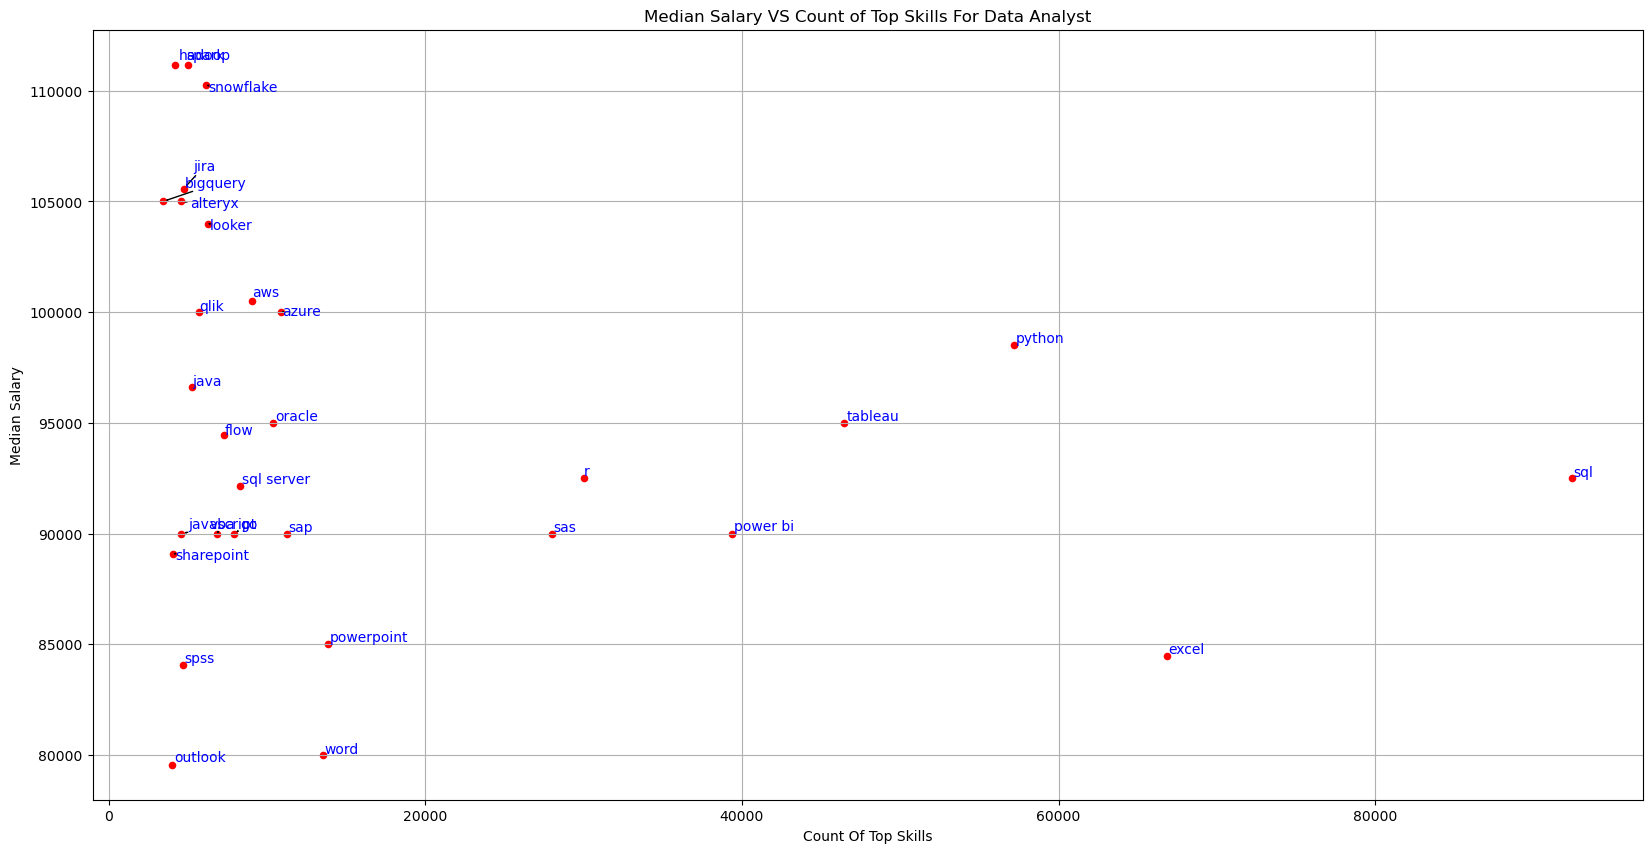

In [ ]:
from adjustText import adjust_text
final_df=df_da_exp.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg' , 'median')
).fillna(0).sort_values(by='skill_count',ascending=False).head(30)
final_df.plot(kind='scatter', x='skill_count', y='median_salary',figsize=(20,10),title='Median Salary VS Count of Top Skills For Data Analyst',color='r',marker='o',grid=True)
texts=[]
# Annotating the scatter plot with skill names
for i , skills in enumerate(final_df.index):
    texts.append(plt.text(final_df['skill_count'].iloc[i], final_df['median_salary'].iloc[i], skills , color='b'))
adjust_text(texts, arrowprops=dict(arrowstyle='->' , color='k', lw=1))
plt.xlabel('Count Of Top Skills')
plt.ylabel('Median Salary')